# **Naive Bayes**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import seaborn as sns


In [2]:
# Reading in data
ds = pd.read_csv("social_networksAds.csv")
X = ds.iloc[:, 2:4].values
y = ds.iloc[:,4].values

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
# Splitting and scaling
X_train, X_test, y_train, y_test = train_test_split(X,y)




###Scaling The Data

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##CLassifier  We Use Gaussian-NaiveBayes

In [6]:
# Classifier
from sklearn.naive_bayes import GaussianNB

Fitting into the Model

In [7]:
nb = GaussianNB()
nb.fit(X_train, y_train)




GaussianNB(priors=None, var_smoothing=1e-09)

###Confusion Matrix

In [8]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)



In [9]:
cm

array([[61,  7],
       [ 3, 29]])

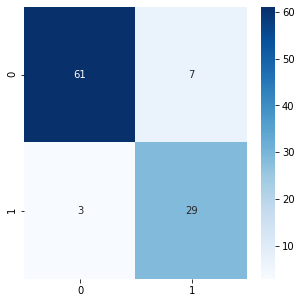

In [12]:
# visualizing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm1, annot = True, cmap = 'Blues')

###Visualize The result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


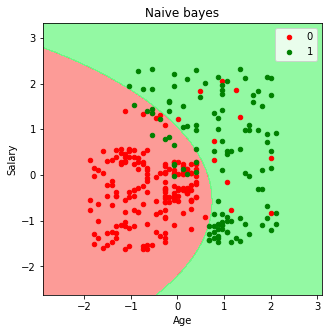

In [14]:
# Plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min() - 1, 
                               X_set[:,0].max() + 1, 
                               step = 0.01),
                     np.arange(X_set[:,1].min() - 1, 
                               X_set[:,1].max() + 1, 
                               step = 0.01))
boundary = nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, boundary, alpha = 0.75, 
             cmap = ListedColormap(('#fc7a74', '#6ff785')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), 
                label = j, s = 20)
plt.title('Naive bayes')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()